# Baseband Modulation

In this notebook we will cover baseband modulation, specifically the Phase Shift Keying (PSK) and Quadrature Amplitude Modulation (QAM) schemes. We will also talk about noise, such as Additive White Gaussian Noise (AWGN) and show a common link quality evaluation metric in Error Vector Magnitude (EVM).

More concretely this notebook is split into these sections:
* Baseband modulation schemes
* Noise and SNR
* Error Vector Magnitude

For this notebook we will be using NumPy for computation and Matplotlib for matlab-like visualizations of our waveforms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Baseband Modulation Schemes

**Binary Phase Shift Keying (BPSK)**

We start by generating some random bits.

In [2]:
bits = np.random.randint(0,2,16)

In [3]:
bits

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [4]:
bpsk_scheme = [-1+0j, 1+0j]

In [5]:
bpsk_symbols = [bpsk_scheme[i] for i in bits]

We can plot our BPSK 'modulated' data on a constellation map. Note that they appear as dots on the horizontal plane, as BPSK only includes the real (I) component.

Text(0, 0.5, 'Channel 2 amplitude')

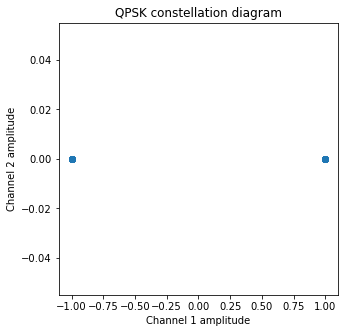

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(np.real(bpsk_symbols), np.imag(bpsk_symbols))
plt.title('QPSK constellation diagram')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')

**Quadrature Phase Shift Keying**

In order to generate QPSK, we have a similar scheme. Except this time we have 4 possible symbols, for 2 bits per symbol.

In [7]:
qpsk_scheme= [1+1j, 1-1j, -1+1j, -1-1j]

We perform the same mapping as we did earlier, but instead of generating random bits we can generate random integers from 0 to 3, which can represent our individual bit pairs i.e. 0 -> 00, 1 -> 01, etc.

In [8]:
ints = np.random.randint(0,4,1024)

In [9]:
ints

array([3, 1, 2, ..., 1, 1, 1])

In [10]:
qpsk_symbols = [qpsk_scheme[i] for i in ints]

Now plot the symbols on a constellation diagram as we did with BPSK. 

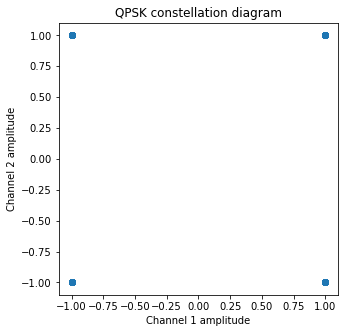

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(np.real(qpsk_symbols), np.imag(qpsk_symbols))
plt.title('QPSK constellation diagram')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')
plt.show()

Let's try the same with 16-QAM. This time it's a modulation scheme with 4 levels (or 4 bits per symbol), which means we will need to generate ints in the range of 0-15. Don't forget when specifying ranges in Python the last digit is not inclusive.

In [12]:
qam_scheme = [-3-3j, -3-1j, -3+3j, -3+1j,  \
              -1-3j, -1-1j, -1+3j, -1+1j,  \
               3-3j,  3-1j,  3+3j,  3+1j,  \
               1-3j,  1-1j,  1+3j,  1+1j]
ints = np.random.randint(0,16,1024)
qam_symbols = [qam_scheme[i] for i in ints]

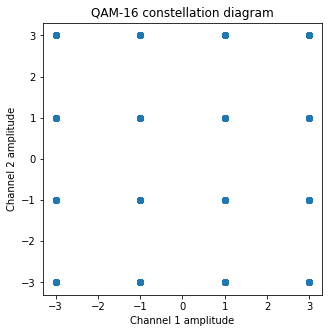

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(np.real(qam_symbols), np.imag(qam_symbols))
plt.title('QAM-16 constellation diagram')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')
plt.show()

We would proceed similarly with 64-QAM, 128-QAM, etc. With good channel conditions we could go as high as 1024-QAM!!

## Noise and SNR

The received signal is unlikely to ever be perfect like shown in above constellation graphs, due to background noise from the environment and even from the thermals of the receiver due imperfect components. A conventional way of approximating all these noises is by adding Additive White Gaussian Noise (AWGN) to oru signal. AWGN follows a gaussian distribution with mean $\mu = 0$, and the variance $\sigma^{2}$ that describes the spread of noise amplitudes.

<img src="./images/noise.png" width="800"></img>

In Python we can use the *random* module and draw from a gaussian distribution for noise to add to our symbols with $\mu = 0$ and $\sigma^{2} = 1$.

In [14]:
noise = np.random.randn(50000,1)
print("    Mean of my signal: {}".format(np.mean(noise)))
print("Variance of my signal: {}".format(np.var(noise)))

    Mean of my signal: -0.00829776119656712
Variance of my signal: 1.003830341781201


While not exactly 0 and 1, the values are pretty darn close. The more samples we took the closer we would get to the ideal statistical values.

Another sanity check we could do to check if we have a normal distribution is by plotting the samples as a histogram. We should see something resembling the iconic bell curve that we are all too familiar with!

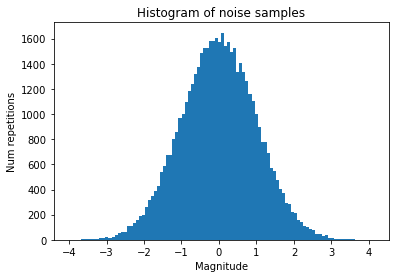

In [15]:
plt.hist(noise, bins=100)
plt.title('Histogram of noise samples')
plt.xlabel('Magnitude')
plt.ylabel('Num repetitions')
plt.show()

The variance of the distribution can be manipulated by multiplying the standard distribution with the square root of the variance. E.g. multiplying our noise vector by 2, gives us the variance of 4.

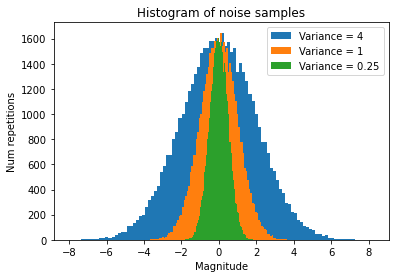

In [16]:
plt.hist(noise*2, bins=100)
plt.hist(noise, bins=100)
plt.hist(noise*0.5, bins=100)
plt.title('Histogram of noise samples')
plt.xlabel('Magnitude')
plt.ylabel('Num repetitions')
plt.legend(('Variance = 4', 'Variance = 1', 'Variance = 0.25'))
plt.show()

**Signal to Noise Ratio**

When talking about noise, we must talk about a very useful measure called the Signal to Noise Ratio (SNR). It is simply the ratio of the power of the signal of interest and the power of the noise.

$SNR = P_{s}/P_{n}$

SNR is most often talked about in terms of decibels (dB), in which case life becomes easier and we can use subtraction instead of division.

$SNR(dB) = P_{s}(dB) - P_{n}(dB)$

Let's say we want to add noise to our QPSK signal so that the SNR is 20dB. First we need to measure the power of our signal.

In [17]:
snr = 10 # specify SNR in dB
sig_power = np.mean(np.abs(qpsk_symbols)**2) # calculate signal power
sig_power_db = 10* np.log10(sig_power) # convert to dB

Recall that $SNR = P_{s}/P_{n}$, which is equivalent to $SNR(dB) = P_{s}(dB) - P_{n}(dB)$. Now that we have our signal power and desired SNR, we can easily calculate the power of our desired noise signal.

In [18]:
noise_power_db = sig_power_db - snr
noise_power = 10**(noise_power_db / 10)

Now generate a noise signal with the desired noise power. Note that we have a division by 2 in the code, this is added because we are dealing with complex signals - if we were dealing with a single channel real signal we would simply multiply our random noise samples by the square root of the desired noise power.

In [19]:
complex_noise = np.sqrt(noise_power/2)*(np.random.randn(len(qpsk_symbols)) + \
                                        np.random.randn(len(qpsk_symbols))*1j)

Add noise to the qpsk symbols by adding the complex noise samples to the symbols.

In [20]:
qpsk_symbols_noisy = qpsk_symbols + complex_noise

Plot the noisy QPSK constellation. Note that the red markers are there to demonstrate how far away the noisy (received) samples are from our ideal scheme constellation points. We can still see 4 distinct clusters and could receive our data relatively error-free.

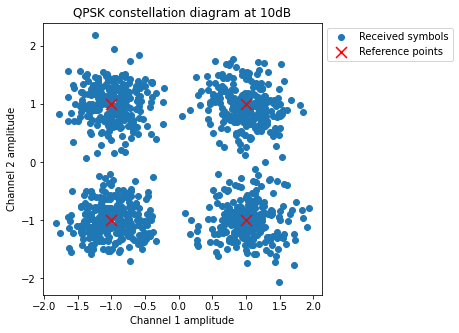

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(qpsk_symbols_noisy.real, qpsk_symbols_noisy.imag)
plt.scatter(np.real(qpsk_scheme), np.imag(qpsk_scheme), s=120, c='red', marker='x')
plt.title('QPSK constellation diagram at 10dB')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')
plt.legend(('Received symbols', 'Reference points'), \
           bbox_to_anchor=(1, 1), loc='upper left')

Let's try adding noise to a 16-QAM signal as well so that the SNR is 20dB. We can still see very nice distinct clusters.

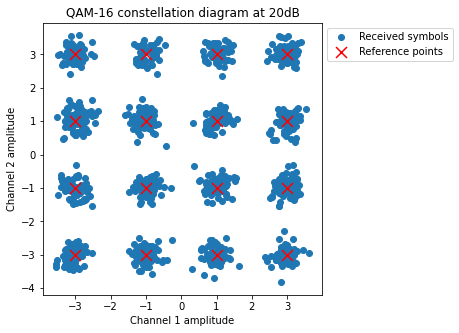

In [22]:
snr = 20 # specify SNR in dB
sig_power = np.mean(np.abs(qam_symbols)**2) # calculate signal power
sig_power_db = 10* np.log10(sig_power) # convert to dB

noise_power_db = sig_power_db - snr
noise_power = 10**(noise_power_db / 10)

complex_noise = np.sqrt(noise_power/2)*(np.random.randn(len(qpsk_symbols)) + \
                                        np.random.randn(len(qpsk_symbols))*1j)

qam_symbols_20db = qam_symbols + complex_noise

plt.figure(figsize=(5,5))
plt.scatter(qam_symbols_20db.real, qam_symbols_20db.imag)
plt.scatter(np.real(qam_scheme), np.imag(qam_scheme), s=120, c='red', marker='x')
plt.title('QAM-16 constellation diagram at 20dB')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')
plt.legend(('Received symbols', 'Reference points'), \
           bbox_to_anchor=(1, 1), loc='upper left')

What would happen if we reduced the SNR down to 10dB?

In [23]:
snr = 10 # specify SNR in dB
sig_power = np.mean(np.abs(qam_symbols)**2) # calculate signal power
sig_power_db = 10* np.log10(sig_power) # convert to dB

noise_power_db = sig_power_db - snr
noise_power = 10**(noise_power_db / 10)

complex_noise = np.sqrt(noise_power/2)*(np.random.randn(len(qpsk_symbols)) + \
                                        np.random.randn(len(qpsk_symbols))*1j)

qam_symbols_10db = qam_symbols + complex_noise

After plotting, note how much more difficult it is to tell the clusters apart, even though it's the same noise ratio as we experienced with QPSK. This is why in practical communication systems the modulation scheme is usually adaptable based on the SNR being observed - if we are experienced poor SNR we might switch to QPSK, at really high SNR values we could go as high as 4096-QAM!

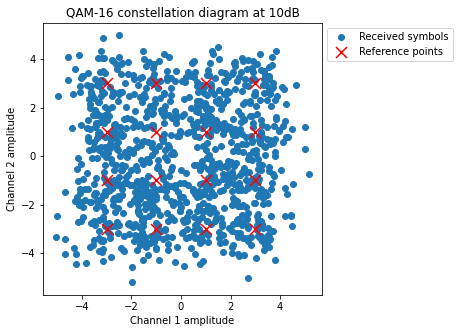

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(qam_symbols_10db.real, qam_symbols_10db.imag)
plt.scatter(np.real(qam_scheme), np.imag(qam_scheme), s=120, c='red', marker='x')
plt.title('QAM-16 constellation diagram at 10dB')
plt.xlabel('Channel 1 amplitude')
plt.ylabel('Channel 2 amplitude')
plt.legend(('Received symbols', 'Reference points'), \
           bbox_to_anchor=(1, 1), loc='upper left')

We can decide pretty well by just looking at these diagrams whether the quality of our received constellations is good or not. But we can also look at defined metrics engineers use to evaluate the quality of these received signals. One of such metrics we will cover is Error Vector Magnitude or EVM.

## Error Vector Magnitude

One way of evaluating the quality of the received signals is by calculating the Error Vector Magnitude (EVM). It is defined as the magnitude of the vector between the received and reference samples points, as a ratio with respect to the magnitude of the reference sample point.

<img src="./images/evm.png" width="400"></img>

It is defined as

$EVM = \frac{\sqrt{\frac{1}{N} \sum^{N}_{n=1}(I_{rx}(n)-I_{0}(n))^2 + (Q_{rx}(n) - Q_{0}(n))^2}}{\sqrt{I_{0}^2 + Q_{0}^2}}$

Now that we have a noisy QAM signal we can calculate the EVM value with respect to the generated clean QAM symbols. Once again in Python we can take advantage of vectorization and using *np.abs* instead of squaring and square rooting. EVM is commonly expressed as a percentage so we will be returning are value of our ratio multiplied by 100.

In [25]:
def calculate_evm(symbols_tx, symbols_rx):
    evm_rms = np.sqrt(np.mean(np.abs(symbols_rx - symbols_tx )**2)) / \
              np.sqrt(np.mean(np.abs(symbols_tx)**2))
    
    return evm_rms*100

In [26]:
print("QAM-16 EVM at 20dB: {:.2f}%".format(calculate_evm(qam_symbols_20db, qam_symbols)))

QAM-16 EVM at 20dB: 10.21%


Our EVM at 20dB SNR for 16-QAM is only 10%, not bad! What if we used our 10dB waveform?

In [27]:
print("QAM-16 EVM at 10dB: {:.2f}%".format(calculate_evm(qam_symbols_10db, qam_symbols)))

QAM-16 EVM at 10dB: 29.74%


As you can see the error magnitude is now around 30%! If we added even more noise this would be problematic and based on this measure, we might decide to use a less complex modulation scheme, such as QPSK.